# EXERCISE 1 MLP KONSTANTAKOS SOTIRIOS

In [12]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [13]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# fix random seed for reproducibility
torch.manual_seed(0)

# SET HYPER-PARAMETERS 

In [14]:
num_epochs = 10
batch_size = 64
learning_rate = 0.1
momentumc=0.9

# LOADING MNIST

In [15]:
# MNIST dataset 

train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

show some of the training images

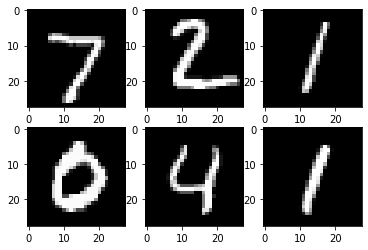

In [16]:
examples = iter(test_loader)
example_data, example_targets = examples.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

# DEFINE  ARCHITECTURE OF OUR MODEL

In [17]:
# Fully connected neural network with one hidden layer
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(784,10)
        nn.init.normal_(self.linear1.weight,mean=0,std=0.1)
        nn.init.normal_(self.linear1.bias,mean=0,std=0.1)
        #self.linear2 = nn.Linear(128,64)
        self.linear2 = nn.Linear(10,10)
        nn.init.normal_(self.linear2.weight,mean=0,std=0.1)
        nn.init.normal_(self.linear2.bias,mean=0,std=0.1)
        
    def forward(self,X):
        X = F.relu(self.linear1(X))
        #X = F.relu(self.linear2(X))
        return F.log_softmax(self.linear2(X),dim=1)

In [18]:
model = Model().to(device)

#  Define a Loss function and optimizer

In [19]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=momentumc)  

# Train the network


In [20]:
for epoch in range(num_epochs):
    running_loss =0
    for i, (images, labels) in enumerate(train_loader):  
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        #foward pass  + backward + optimize
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(epoch, running_loss/len(train_loader)))

Epoch 0 - Training loss: 0.4534797858057627
Epoch 1 - Training loss: 0.3221931814281607
Epoch 2 - Training loss: 0.3027522132666444
Epoch 3 - Training loss: 0.28736647116000463
Epoch 4 - Training loss: 0.2804354678974477
Epoch 5 - Training loss: 0.2791657275093326
Epoch 6 - Training loss: 0.27027229258198854
Epoch 7 - Training loss: 0.2698177444273983
Epoch 8 - Training loss: 0.2647132763643064
Epoch 9 - Training loss: 0.2611175283813464


# Evaluate our model

In [21]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
correct_count, all_count = 0, 0
for images,labels in test_loader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)

        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count)*100)

Number Of Images Tested = 10000

Model Accuracy = 92.69


Για να πετύχουμε πάνω απο 97 % accuracy έγιναν οι παρακάτω αλλαγές.Έγινε αλλαγή στην αρχιτεκτονική του νευρωνικού μας δικτύου.Πρόσθεσα ένα κρυφό επίπεδο που περιέχει 128 νευρώνες και ακολουθεί ένα ακόμα κρυφό επίπεδο που περιέχει 64 νευρώνες και τέλος το επίπεδο εξόδου και άλλαξα το lr σε 0.01.Οι συναρτήσεις ενεργοποίησης στα κρυφά επίπεδα είναι οι relu.Παρατηρούμε ότι από όλες τις υπέρ-παραμέτρους αυτό που επηρεάζει πιο πολύ ώστε να έχει καλύτερο accuracy το μοντέλο μας είναι του τι αρχιτεκτονική θα επιλέξουμε για το δίκτυο μας.Προσθέτοντας ένα ακόμα κρυφό επίπεδο βλέπουμε αρκετή διαφορά στο accuracy του μοντέλου μας ενώ όταν κάνουμε tune τις άλλες υπερ-παραμέτρους(κρατώντας τις άλλες με τις τιμές που τις είχαμε αρχικά) δεν παρατηρούμε μεγάλες βελτιώσεις.